In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets


In [9]:
likari_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/example/1.0.2 медичний заклад/likari.csv')
zvit1_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/example/1.0.2 медичний заклад/zvit1.csv')
zvit2_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/example/1.0.2 медичний заклад/zvit2.csv')
viddil_df = pd.read_csv('C:/Users/Anastasiia/Desktop/homework_kvs_python/exam/example/1.0.2 медичний заклад/viddilennya.csv')


In [10]:
merge_zvit_df = pd.concat([zvit1_df, zvit2_df], ignore_index = True)
merge_df = pd.merge(merge_zvit_df, likari_df, on="likar_id", how = 'left')
merge_df = pd.merge(merge_df, viddil_df, on='viddil_id', how='left')
merge_df


,date,patient,likar_id,hours,last_name,viddil_id,name_viddil,likar_price
0,2023-12-13,Kulic,1,1,Likar1,1,Hirurg,10000
1,2023-12-18,Miracle,1,2,Likar1,1,Hirurg,10000
2,2023-12-12,Gruzov,2,3,Likar2,2,Ortadont,12000
3,2023-12-20,Popov,3,4,Likar3,3,Pediatr,13000
4,2023-12-11,Chyn,4,5,Likar4,4,Oculus,14000
5,2023-12-09,Yzcik,5,7,Likar5,5,Travmatolog,15000
6,2023-12-13,Kulic,2,8,Likar2,2,Ortadont,12000
7,2023-12-11,Miracle,3,5,Likar3,3,Pediatr,13000
8,2023-12-15,Gruzov,1,3,Likar1,1,Hirurg,10000
9,2023-12-17,Popov,2,8,Likar2,2,Ortadont,12000


In [11]:
total_earnings = merge_df['hours'] * merge_df['likar_price']
total_earnings_by_doctor = total_earnings.groupby(merge_df['last_name']).sum().reset_index()

# Переименование столбцов
total_earnings_by_doctor.columns = ['last_name', 'total_earnings']
total_earnings_by_doctor


,last_name,total_earnings
0,Likar1,60000
1,Likar2,228000
2,Likar3,117000
3,Likar4,84000
4,Likar5,135000


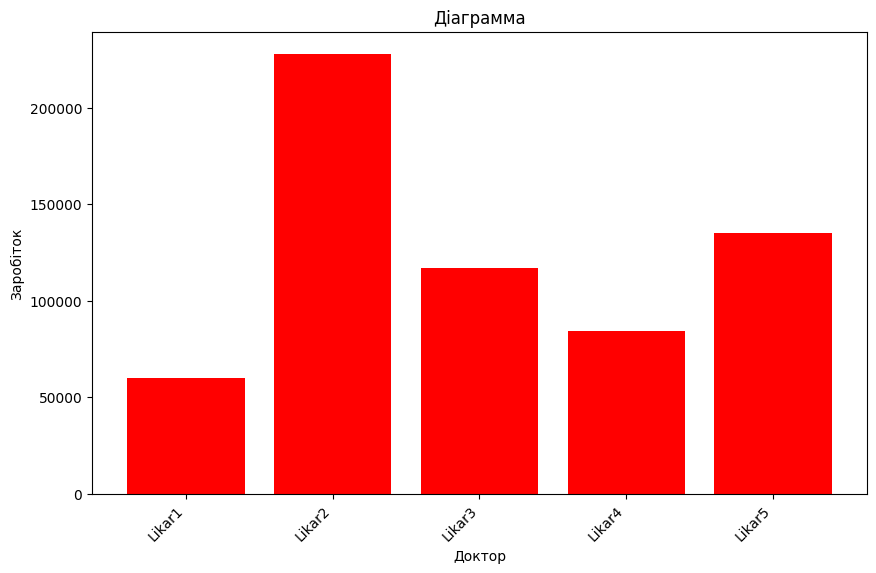

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(total_earnings_by_doctor['last_name'], total_earnings_by_doctor['total_earnings'], color='red')
plt.title('Діаграмма')
plt.xlabel('Доктор')
plt.ylabel('Заробіток')
plt.xticks(rotation=45, ha='right')  # Повернуть подписи оси X для лучшей читаемости

plt.show()

In [15]:
start_date_widget = widgets.DatePicker(description='Початкова дата', value=pd.to_datetime(merge_df['date'].min()))
end_date_widget = widgets.DatePicker(description='Кінцева дата', value=pd.to_datetime(merge_df['date'].max()))
display(start_date_widget, end_date_widget)

merge_df['date'] = pd.to_datetime(merge_df['date'])
filtered_df = merge_df[(merge_df['date'] >= start_date_widget.value) & (merge_df['date'] <= end_date_widget.value)]

earnings_by_department = filtered_df.groupby('name_viddil').agg({'hours': 'sum', 'likar_price': 'mean'}).reset_index()
earnings_by_department['total_earnings'] = earnings_by_department['hours'] * earnings_by_department['likar_price']

earnings_by_department

 

DatePicker(value=Timestamp('2023-12-09 00:00:00'), description='Початкова дата', step=1)

DatePicker(value=Timestamp('2023-12-20 00:00:00'), description='Кінцева дата', step=1)

,name_viddil,hours,likar_price,total_earnings
0,Hirurg,6,10000.0,60000.0
1,Oculus,6,14000.0,84000.0
2,Ortadont,19,12000.0,228000.0
3,Pediatr,9,13000.0,117000.0
4,Travmatolog,9,15000.0,135000.0


In [14]:
daily_expenses_by_patient = merge_df.groupby(['patient', 'date'])[['hours', 'likar_price']].sum().reset_index()
daily_expenses_by_patient['total_expenses'] = daily_expenses_by_patient['hours'] * daily_expenses_by_patient['likar_price']

daily_expenses_by_patient

,patient,date,hours,likar_price,total_expenses
0,Chyn,2023-12-11,5,14000,70000
1,Chyn,2023-12-12,2,15000,30000
2,Gruzov,2023-12-12,3,12000,36000
3,Gruzov,2023-12-15,3,10000,30000
4,Kulic,2023-12-13,9,22000,198000
5,Miracle,2023-12-11,5,13000,65000
6,Miracle,2023-12-18,2,10000,20000
7,Popov,2023-12-17,8,12000,96000
8,Popov,2023-12-20,4,13000,52000
9,Yzcik,2023-12-09,7,15000,105000
